In [11]:
#pip install tensorflow

In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# loading the data

#loading csv
labels_df = pd.read_csv(r'D:\Number_recognition_project\Data\Grey_scale_images\image_labels.csv')


In [3]:
labels_df.head()

,filename,label
0,1_1_1.png,1
1,1_1_2.png,1
2,1_1_3.png,1
3,1_1_4.png,1
4,1_1_5.png,1


In [10]:
# Define the path to the images
image_folder = r'D:\Number_recognition_project\Data\Grey_scale_images\word_images'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the DataFrame and load each image
for index, row in labels_df.iterrows():
    img_path = os.path.join(image_folder, row['filename'])
    
    # Load the image (grayscale)
    img = load_img(img_path, color_mode='grayscale', target_size=(160,40)) # Change target_size as needed
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Normalize the image (optional)
    #img_array = img_array / 255.0
    
    # Append the image and label to the lists
    images.append(img_array)
    labels.append(row['label'])

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)


In [11]:
print(X.shape)
print(y.shape)

(9000, 160, 40, 1)
(9000,)


In [12]:
np.unique(y)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [17]:
# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [18]:
y = to_categorical(y - 1, num_classes=100)

In [21]:
print(X.shape)
print(y.shape)

(9000, 160, 40, 1)
(9000, 100)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (7200, 160, 40, 1)
y_train shape (7200, 100)
X_test shape (1800, 160, 40, 1)
y_test shape (1800, 100)


In [26]:
model = Sequential()

# First Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 40, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last conv layer
model.add(Flatten())

# Fully connected Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='softmax'))  # 100 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 19, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 6, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 3, 128)        0

In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
113/113 [==============================] - 62s 507ms/step - loss: 5.6588 - accuracy: 0.0081 - val_loss: 4.6061 - val_accuracy: 0.0044
Epoch 2/20
113/113 [==============================] - 51s 450ms/step - loss: 4.6057 - accuracy: 0.0089 - val_loss: 4.6070 - val_accuracy: 0.0044
Epoch 3/20
113/113 [==============================] - 50s 443ms/step - loss: 4.6052 - accuracy: 0.0097 - val_loss: 4.6077 - val_accuracy: 0.0044
Epoch 4/20
113/113 [==============================] - 51s 448ms/step - loss: 4.6050 - accuracy: 0.0103 - val_loss: 4.6087 - val_accuracy: 0.0044
Epoch 5/20
113/113 [==============================] - 50s 446ms/step - loss: 4.6049 - accuracy: 0.0114 - val_loss: 4.6093 - val_accuracy: 0.0044
Epoch 6/20
113/113 [==============================] - 50s 438ms/step - loss: 4.6048 - accuracy: 0.0114 - val_loss: 4.6099 - val_accuracy: 0.0044
Epoch 7/20
113/113 [==============================] - 50s 446ms/step - loss: 4.6047 - accuracy: 0.0114 - val_loss: 4.6105 - val_ac

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

57/57 [==============================] - 5s 88ms/step - loss: 4.6152 - accuracy: 0.0044
Test accuracy: 0.0044


In [29]:
model.save('number_recognition_cnn.h5')

d:\Projects\mlproject\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) + 1 

57/57 [==============================] - 5s 76ms/step


In [35]:
predictions[0]

array([0.00996712, 0.00919015, 0.00958845, 0.01033081, 0.00990803,
       0.01000435, 0.00967187, 0.00979761, 0.00986595, 0.00968814,
       0.00965361, 0.00998339, 0.01000913, 0.00965443, 0.00950328,
       0.01093157, 0.0095365 , 0.0101043 , 0.01002789, 0.01046412,
       0.01035683, 0.01022088, 0.00998958, 0.00964275, 0.00973281,
       0.01079909, 0.00999671, 0.01021473, 0.01022255, 0.00952312,
       0.01040247, 0.01000167, 0.00895178, 0.01025413, 0.00981672,
       0.01033741, 0.0092956 , 0.00980179, 0.01000276, 0.00933474,
       0.01035712, 0.00890551, 0.01024339, 0.010479  , 0.01089061,
       0.00956523, 0.00952553, 0.00998815, 0.01013282, 0.00941397,
       0.00986215, 0.01025288, 0.01012619, 0.00953637, 0.01091012,
       0.01036118, 0.01010926, 0.00980133, 0.01000547, 0.01010127,
       0.00974323, 0.01019863, 0.01046592, 0.01012015, 0.009618  ,
       0.01082335, 0.01119827, 0.00986478, 0.01057716, 0.00963424,
       0.00988654, 0.01003982, 0.01025598, 0.01042544, 0.01046

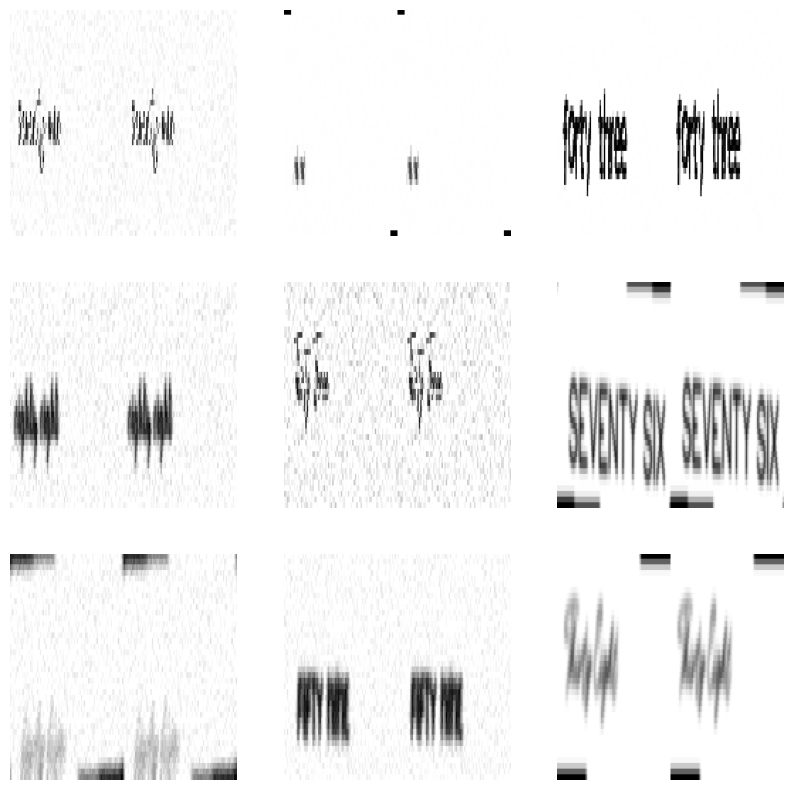

In [30]:
import matplotlib.pyplot as plt

# Function to display a grid of 9 images from X_train
def show_images(X_train):
    plt.figure(figsize=(10, 10))
    
    # Loop to plot 9 images
    for i in range(9):
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
        plt.imshow(X_train[i].reshape(160,160), cmap='gray')  # Reshape and display the image
        plt.axis('off')  # Turn off axis labels
    
    plt.show()

# Call the function to display images
show_images(X_train)

In [32]:
#reshaping the images
X_train = X_train.reshape(7200, 25600) 
X_test = X_test.reshape(1800, 25600)   

# X_train = X_train.astype('float32')   
# X_test = X_test.astype('float32')

# X_train /= 255                        
# X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (7200, 25600)
Testing matrix shape (1800, 25600)


In [33]:
no_classes = 100

Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)